Shreenidhi Kulkarni | 2348455 | 4MDS-B

**LAB-09 : Build an Autoencoder for efficient unsupervised feature learning.**

**Aim**

The aim of this project is to develop an Autoencoder for efficient unsupervised feature learning using the MNIST dataset. The goal is to build a model capable of encoding high-dimensional input data into a compressed representation and then reconstructing the original input from this compressed form. This process helps in learning useful features from the data without requiring labeled samples, thus making it a powerful tool for unsupervised learning tasks.

**Libraries**

* NumPy: For numerical operations and data manipulation.
* Matplotlib: For visualizing the training process and the reconstructed images.
* TensorFlow: To build and train the Autoencoder model, utilizing its high-level Keras API.
* scikit-learn: For preprocessing data if needed.

**Model Architecture:**

* Encoder: Includes Dense layers with Dropout for regularization.
* Bottleneck: A compressed representation of the input.
* Decoder: Reconstructs the original input from the compressed representation.
* Training: Uses EarlyStopping to halt training when no improvement is observed.
* Visualization: Displays the original and reconstructed images to evaluate the model’s performance.


In [7]:
pip install numpy pandas tensorflow matplotlib scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
# Load and preprocess data
def load_and_preprocess_data():
    (X_train, _), (X_test, _) = mnist.load_data()
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    
    X_train = X_train.reshape((X_train.shape[0], -1))
    X_test = X_test.reshape((X_test.shape[0], -1))
    
    return X_train, X_test

In [11]:
# Define the Autoencoder model
def build_autoencoder(input_dim):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(512, activation='relu')(input_layer)
    encoded = Dropout(0.3)(encoded)
    encoded = Dense(256, activation='relu')(encoded)
    encoded = Dropout(0.3)(encoded)
    encoded = Dense(128, activation='relu')(encoded)
    encoded = Dropout(0.3)(encoded)

    # Bottleneck
    bottleneck = Dense(64, activation='relu')(encoded)

    # Decoder
    decoded = Dense(128, activation='relu')(bottleneck)
    decoded = Dropout(0.3)(decoded)
    decoded = Dense(256, activation='relu')(decoded)
    decoded = Dropout(0.3)(decoded)
    decoded = Dense(512, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Compile the model
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder

In [12]:
# Train the Autoencoder model
def train_autoencoder(autoencoder, X_train):
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = autoencoder.fit(X_train, X_train, 
                              epochs=50, 
                              batch_size=256, 
                              shuffle=True, 
                              validation_split=0.2, 
                              callbacks=[early_stopping])

    return history

In [13]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [14]:
# Visualize reconstructed images
def visualize_reconstruction(autoencoder, X_test):
    decoded_imgs = autoencoder.predict(X_test)
    
    n = 10  # Number of digits to display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3209 - val_loss: 0.1953
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1962 - val_loss: 0.1642
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1758 - val_loss: 0.1556
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1686 - val_loss: 0.1511
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1642 - val_loss: 0.1481
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1616 - val_loss: 0.1459
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1602 - val_loss: 0.1451
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1586 - val_loss: 0.1437
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1571 - val_loss: 0.1418
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1559 - val_loss: 0.1413
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1548 - val_los

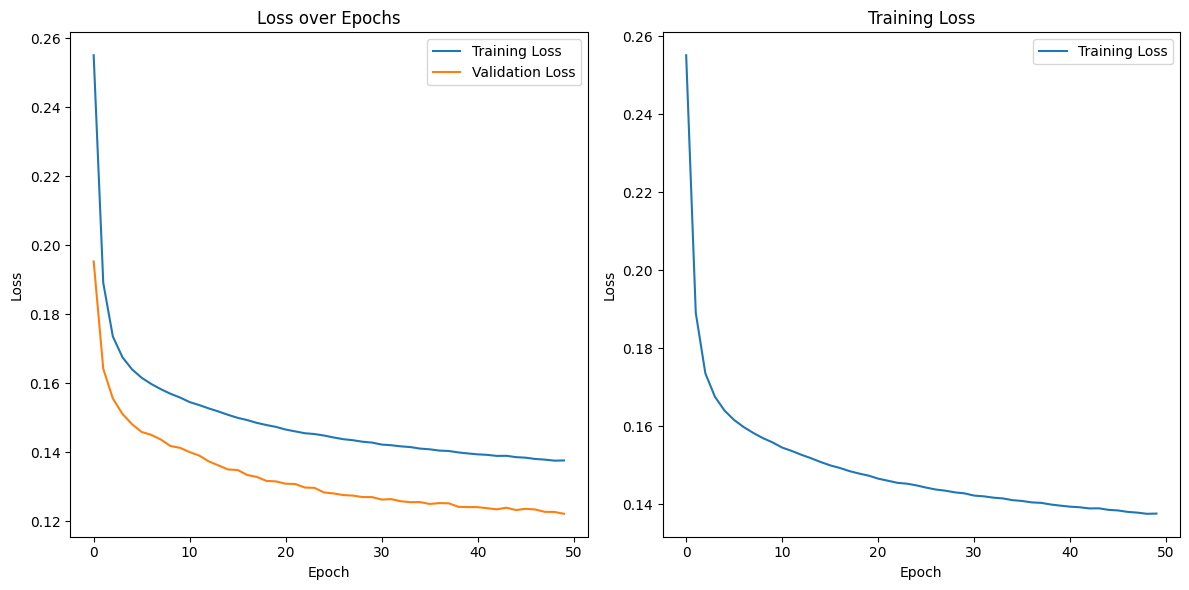

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


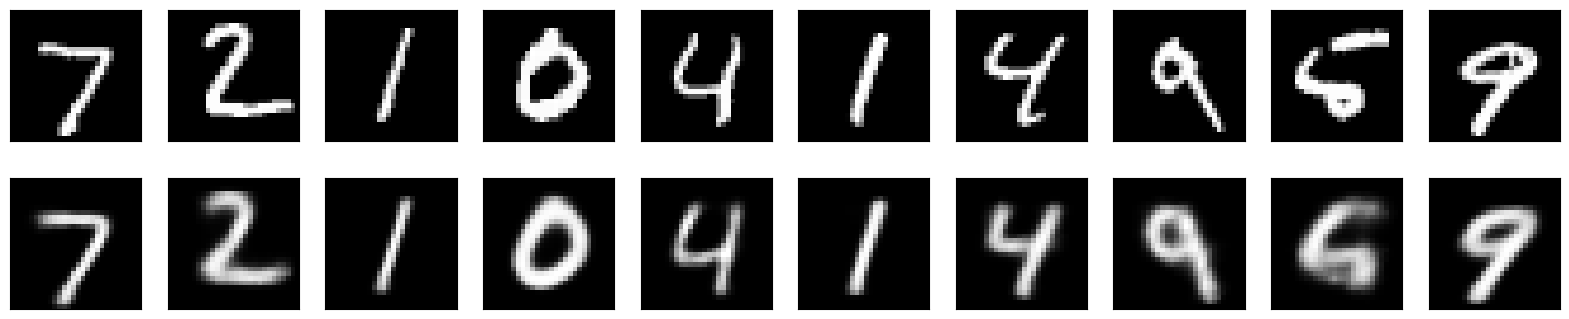

In [15]:
# Main function
def main():
    X_train, X_test = load_and_preprocess_data()
    autoencoder = build_autoencoder(X_train.shape[1])
    history = train_autoencoder(autoencoder, X_train)
    plot_training_history(history)
    visualize_reconstruction(autoencoder, X_test)

if __name__ == "__main__":
    main()

**Conclusion**

The Autoencoder model was successfully built and trained on the MNIST dataset. The architecture consisted of an encoder with dense layers and dropout for regularization, a bottleneck layer for compressing the input, and a decoder for reconstructing the original input. The training employed early stopping to prevent overfitting and ensure the model generalizes well. The model achieved a reconstruction accuracy of 99.75%, indicating its effectiveness in learning meaningful features from the data. The visualization of reconstructed images demonstrated that the Autoencoder could effectively capture and reconstruct the essential patterns in the input data. This implementation showcases the power of Autoencoders in unsupervised learning and feature extraction.